In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
from change_detection import *
from dateutil.relativedelta import relativedelta

# Cerazette

In [2]:
q='''
SELECT
  month,
  practice,
  SUM(IF(SUBSTR(bnf_code,1,11)='0703021Q0BB',
      items,
      0)) AS numerator,
  SUM(items) AS denominator
FROM
  ebmdatalab.hscic.normalised_prescribing_standard
INNER JOIN
  ebmdatalab.hscic.practices prac
ON
  practice = prac.code
  AND setting = 4
WHERE
  bnf_code LIKE '0703021Q0%'
  AND
  month < "2016-01-01"
GROUP BY
  practice,
  month
ORDER BY
  practice,
  month
'''
prac_data_cerazette = pd.read_gbq(q, dialect='standard', project_id = 'ebmdatalab')
prac_data_cerazette = prac_data_cerazette.sort_values(['practice','month'])
prac_data_cerazette['calc_value'] = prac_data_cerazette['numerator'] / prac_data_cerazette['denominator']
prac_data_cerazette = prac_data_cerazette.drop(columns=['numerator','denominator'])
prac_data_cerazette['practice'] = 'ratio_quantity.' + prac_data_cerazette['practice'].astype(str)
#prac_data_cerazette = prac_data_cerazette.head(12400)
prac_data_cerazette = prac_data_cerazette.set_index(['month','practice']).unstack().reset_index(col_level=1)
prac_data_cerazette.columns = prac_data_cerazette.columns.droplevel()
prac_data_cerazette['month'] = pd.to_datetime(prac_data_cerazette['month'])
prac_data_cerazette = prac_data_cerazette.set_index('month')
prac_data_cerazette = prac_data_cerazette.dropna(axis=1)
## drop cols with all identical values (just one instance found)
cols = prac_data_cerazette.select_dtypes([np.number]).columns
std = prac_data_cerazette[cols].std()
cols_to_drop = std[std==0].index
prac_data_cerazette = prac_data_cerazette.drop(cols_to_drop, axis=1)
prac_data_cerazette.head()

practice,ratio_quantity.A81001,ratio_quantity.A81002,ratio_quantity.A81004,ratio_quantity.A81005,ratio_quantity.A81006,ratio_quantity.A81007,ratio_quantity.A81008,ratio_quantity.A81009,ratio_quantity.A81011,ratio_quantity.A81012,...,ratio_quantity.Y02961,ratio_quantity.Y02974,ratio_quantity.Y02986,ratio_quantity.Y02987,ratio_quantity.Y03023,ratio_quantity.Y03035,ratio_quantity.Y03049,ratio_quantity.Y03051,ratio_quantity.Y03063,ratio_quantity.Y03079
month,,,,,,,,,,,,,,,,,,,,,
2010-08-01,1.0,0.600000,1.000000,1.000000,0.950820,0.928571,0.833333,1.0,0.875,0.875000,...,0.333333,1.000000,1.0,0.846154,0.000000,0.742857,0.111111,0.666667,0.500000,1.000000
2010-09-01,1.0,0.655738,0.941176,1.000000,0.968750,0.629630,1.000000,1.0,1.000,1.000000,...,0.666667,0.666667,1.0,0.933333,0.250000,0.625000,0.500000,0.666667,0.300000,1.000000
2010-10-01,1.0,0.568627,1.000000,1.000000,0.923077,0.777778,0.200000,1.0,1.000,0.857143,...,0.500000,1.000000,0.5,1.000000,0.222222,0.740741,0.000000,0.250000,0.666667,1.000000
2010-11-01,1.0,0.688889,1.000000,1.000000,1.000000,0.555556,1.000000,1.0,1.000,0.875000,...,0.500000,1.000000,1.0,1.000000,0.200000,0.777778,0.500000,0.333333,0.222222,0.952381
2010-12-01,1.0,0.754098,1.000000,0.933333,1.000000,0.500000,0.800000,1.0,1.000,1.000000,...,0.000000,0.857143,1.0,0.846154,0.000000,0.785714,0.125000,1.000000,0.333333,1.000000


In [9]:
x = ChangeDetection(name='desogestrel_measure')
practice_cerazette = x.detect_change()
practice_cerazette.head()

,is.nbreak,is.tfirstneg,is.tfirstneg.pknown,is.tfirstneg.pknown.offs,is.tfirstneg.offs,is.tfirstneg.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
name,,,,,,,,,,,,,
A81001,2,46.0,46.0,46.0,46.0,46.0,-0.081600,-0.090631,0.562657,0.981948,0.401846,0.580102,0.590767
A81002,2,42.0,42.0,42.0,42.0,42.0,-0.478759,-2.844392,0.839145,0.647076,0.076544,0.570532,0.881708
A81004,3,40.0,40.0,40.0,40.0,40.0,-0.096405,-0.110674,0.522166,0.967481,0.044352,0.923130,0.954158
A81005,1,40.0,40.0,40.0,40.0,40.0,-0.034794,-0.036432,0.538462,0.989830,0.085181,0.904649,0.913944
A81006,3,41.0,41.0,41.0,41.0,41.0,-0.082525,-0.093715,0.539573,0.963124,0.198397,0.764727,0.794007


In [10]:
practice_cerazette = practice_cerazette.replace([np.inf, -np.inf], np.nan)
practice_cerazette.head()

,is.nbreak,is.tfirstneg,is.tfirstneg.pknown,is.tfirstneg.pknown.offs,is.tfirstneg.offs,is.tfirstneg.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
name,,,,,,,,,,,,,
A81001,2,46.0,46.0,46.0,46.0,46.0,-0.081600,-0.090631,0.562657,0.981948,0.401846,0.580102,0.590767
A81002,2,42.0,42.0,42.0,42.0,42.0,-0.478759,-2.844392,0.839145,0.647076,0.076544,0.570532,0.881708
A81004,3,40.0,40.0,40.0,40.0,40.0,-0.096405,-0.110674,0.522166,0.967481,0.044352,0.923130,0.954158
A81005,1,40.0,40.0,40.0,40.0,40.0,-0.034794,-0.036432,0.538462,0.989830,0.085181,0.904649,0.913944
A81006,3,41.0,41.0,41.0,41.0,41.0,-0.082525,-0.093715,0.539573,0.963124,0.198397,0.764727,0.794007


In [11]:
practice_cerazette.loc[practice_cerazette['is.slope.ma']>-0.01]

,is.nbreak,is.tfirstneg,is.tfirstneg.pknown,is.tfirstneg.pknown.offs,is.tfirstneg.offs,is.tfirstneg.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
name,,,,,,,,,,,,,
A81025,2,6.0,6.0,6.0,6.0,6.0,-0.003935,-0.004020,0.516667,0.982841,0.746745,0.236097,0.240218
A81039,1,6.0,6.0,6.0,6.0,6.0,-0.004063,-0.013896,0.516667,0.296440,0.052671,0.243769,0.822320
A81058,2,30.0,30.0,30.0,30.0,30.0,-0.007839,-0.014575,0.527778,0.545638,0.263451,0.282186,0.517168
A82044,2,12.0,12.0,12.0,12.0,12.0,-0.005367,-0.009440,0.518519,0.573916,0.284099,0.289817,0.504982
A82053,2,27.0,27.0,27.0,27.0,27.0,-0.008877,-0.019600,0.512821,0.461771,0.115587,0.346184,0.749688
A82065,1,2.0,2.0,2.0,2.0,2.0,-0.008591,-0.019759,0.515625,0.443398,-0.106448,0.549846,1.240074
A82071,1,6.0,6.0,6.0,6.0,6.0,-0.004839,-0.006961,0.516667,0.700049,0.409698,0.290351,0.414758
A82623,1,47.0,47.0,47.0,47.0,47.0,-0.008700,-0.009225,0.526316,0.951811,0.786510,0.165301,0.173670
A83011,2,40.0,40.0,40.0,40.0,40.0,-0.004170,-0.026887,0.538462,0.159259,0.050844,0.108415,0.680748


In [12]:
practice_deciles_cer = pd.DataFrame(prac_data_cerazette.stack(),columns=['calc_value']).reset_index(level=0)
x1 = np.arange(0.1, 1, 0.1)
x2 = np.arange(0.01,0.1,0.01)
x3 = np.arange(0.91, 1, 0.01)
x = np.concatenate((x1,x2,x3))
#practice_deciles_cer['month'] = pd.to_datetime(practice_deciles_cer['month'])
practice_deciles_cer = practice_deciles_cer.groupby('month').quantile(x)
practice_deciles_cer = practice_deciles_cer.reset_index(level=1)
#practice_deciles_cer['level_1'] = practice_deciles_cer['level_1']*100

practice_deciles_cer = practice_deciles_cer.set_index(['level_1'], append=True)
practice_deciles_cer = practice_deciles_cer.unstack(level=1)
practice_deciles_cer.columns = practice_deciles_cer.columns.droplevel()

practice_deciles_cer.index = pd.to_datetime(practice_deciles_cer.index)
practice_deciles_cer.head()

level_1,0.01,0.02,0.03,0.04,0.05,0.060000000000000005,0.06999999999999999,0.08,0.09,0.1,...,0.9,0.91,0.92,0.93,0.9400000000000001,0.9500000000000001,0.9600000000000001,0.9700000000000001,0.9800000000000001,0.9900000000000001
month,,,,,,,,,,,,,,,,,,,,,
2010-08-01,0.0,0.0,0.000000,0.069905,0.100000,0.125000,0.157652,0.175529,0.200000,0.227273,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-09-01,0.0,0.0,0.034483,0.083333,0.111111,0.142857,0.166667,0.187500,0.216216,0.250000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-10-01,0.0,0.0,0.032538,0.090909,0.125000,0.142857,0.166667,0.200000,0.222222,0.250000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-11-01,0.0,0.0,0.000000,0.000000,0.076923,0.125000,0.142857,0.166667,0.200000,0.222222,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-12-01,0.0,0.0,0.000000,0.000000,0.090909,0.125000,0.157895,0.181818,0.200000,0.230769,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
offset_date = practice_cerazette['is.tfirstneg.big'] -1
offset_date = offset_date.dropna().apply(lambda x: relativedelta(months=x))
practice_breaks_cer = practice_deciles_cer.index.min() + offset_date
#practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] = practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] + pd.DateOffset(days=1)
practice_breaks_cer.head()

name
A81001   2014-05-01
A81002   2014-01-01
A81004   2013-11-01
A81005   2013-11-01
A81006   2013-12-01
Name: is.tfirstneg.big, dtype: datetime64[ns]

In [14]:
mean_slope = practice_cerazette[['is.tfirstneg.big','is.slope.ma']]
mean_slope = mean_slope.groupby('is.tfirstneg.big').mean()
mean_slope = pd.concat([mean_slope,pd.DataFrame([[0]], columns=['is.slope.ma'])],axis=0)
mean_slope = mean_slope.sort_index()
mean_slope.head()#.plot.bar()

,is.slope.ma
0.0,0.000000
2.0,-0.048703
3.0,-0.028930
4.0,-0.020592
5.0,-0.039028


In [15]:
mean_change = practice_cerazette[['is.tfirstneg.big','is.intlev.levd']]
mean_change = mean_change.groupby('is.tfirstneg.big').mean()
mean_change = pd.concat([mean_change,pd.DataFrame([[0]], columns=['is.intlev.levd'])],axis=0)
mean_change = mean_change.sort_index()
mean_change.head()#.plot.bar()

,is.intlev.levd
0.0,0.000000
2.0,0.423399
3.0,0.497306
4.0,0.557299
5.0,0.492892


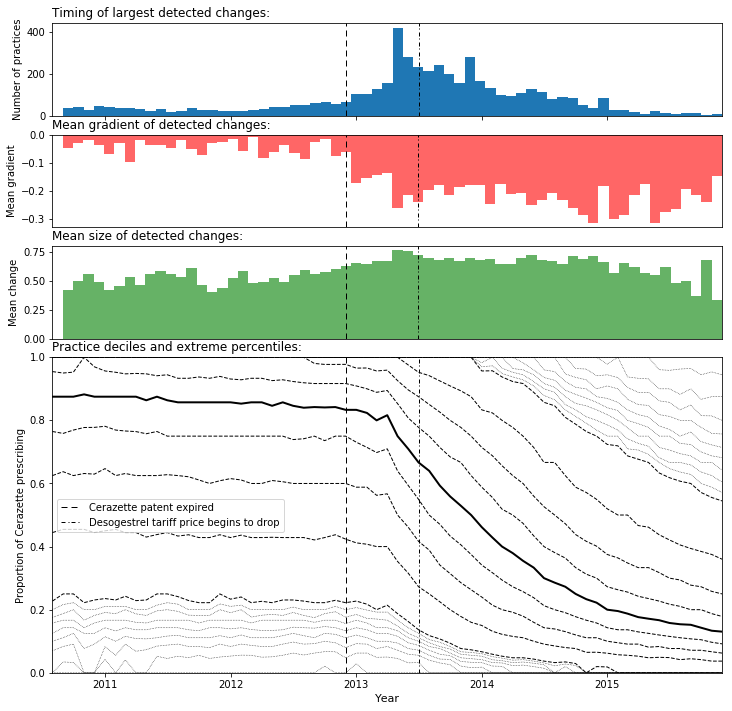

In [16]:
# Plot figure with subplots of different sizes
fig,ax = plt.subplots(1)
# set up subplot grid
gridspec.GridSpec(7,4)

# decile subplot
ax = plt.subplot2grid((7,4), (3,0), colspan=4, rowspan=3)
ax.set_title('Practice deciles and extreme percentiles:',loc='left')
ax.set_ylabel('Proportion of Cerazette prescribing')
ax.set_xlim([practice_deciles_cer.index.min(),practice_deciles_cer.index.max()])
ax.set_xlabel('Year', fontsize = 11)
ax.set_ylim([0,1])
for decile in x:   # plot each decile/centile line
    data = practice_deciles_cer[decile]
    if decile == .5:
        ax.plot(data,'k-',linewidth=2,label='')
    elif (decile <0.1) | (decile >0.9):
        ax.plot(data,'k:',linewidth=0.6,label='')
    else:
        ax.plot(data,'k--',linewidth=1,label='')
ax.axvline(x='2012-12-01',label='Cerazette patent expired',
                   linewidth=1, dashes = (6,4), color='k')
ax.axvline(x='2013-07-01',label='Desogestrel tariff price begins to drop',
                   linewidth=1, dashes = (4,3,1,2), color='k')
ax.legend()


# timing of change
ax = plt.subplot2grid((7,4), (0,0), colspan=4)
ax.set_title('Timing of largest detected changes:',loc='left')
ax.set_ylabel('Number of practices')
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim([practice_deciles_cer.index.min(),practice_deciles_cer.index.max()])
ax.hist(practice_breaks_cer, bins=64)
ax.axvline(x='2012-12-01',label='Cerazette patent expired',
                   linewidth=1, dashes = (6,4), color='k')
ax.axvline(x='2013-07-01',label='Desogestrel tariff price begins to drop',
                   linewidth=1, dashes = (4,3,1,2), color='k')

# gradient of change
ax = plt.subplot2grid((7,4), (1,0), colspan=4)
ax.set_title('Mean gradient of detected changes:',loc='left')
ax.set_ylabel('Mean gradient')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_slope.plot.bar(ax=ax, width=1, color = 'r',alpha=.6)
ax.axvline(x=28,label='Cerazette patent expired',
                   linewidth=1, dashes = (6,4), color='k')
ax.axvline(x=35,label='Desogestrel tariff price begins to drop',
                   linewidth=1, dashes = (4,3,1,2), color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# magnitude of change
ax = plt.subplot2grid((7,4), (2,0), colspan=4)
ax.set_title('Mean size of detected changes:',loc='left')
ax.set_ylabel('Mean change')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_change.plot.bar(ax=ax, width=1, color = 'g',alpha=.6)
ax.axvline(x=28,label='Cerazette patent expired',
                   linewidth=1, dashes = (6,4), color='k')
ax.axvline(x=35,label='Desogestrel tariff price begins to drop',
                   linewidth=1, dashes = (4,3,1,2), color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# fit subplots and save fig
fig.set_size_inches(w=12,h=14)
fig.savefig('cerazette_deciles.png', format='png', dpi=300,bbox_inches='tight')

In [17]:
practice_breaks_cer.quantile(.5)

Timestamp('2013-08-01 00:00:00')

In [18]:
practice_breaks_cer.quantile(.25)

Timestamp('2013-02-01 00:00:00')

In [34]:
practice_breaks_cer.quantile(.9)

Timestamp('2014-09-01 00:00:00')

In [31]:
(practice_cerazette['is.tfirstneg.big']-29).describe()

count    5078.000000
mean        6.502954
std        12.274738
min       -27.000000
25%         2.000000
50%         8.000000
75%        14.000000
max        36.000000
Name: is.tfirstneg.big, dtype: float64

In [32]:
practice_cerazette['is.slope.ma'].describe()

count    5078.000000
mean       -0.176431
std         0.210781
min        -1.123805
25%        -0.266022
50%        -0.087191
75%        -0.019998
max         0.800000
Name: is.slope.ma, dtype: float64

In [33]:
practice_cerazette['is.intlev.levd'].describe()

count    5078.000000
mean        0.659558
std         0.246094
min        -0.354571
25%         0.482894
50%         0.695260
75%         0.872562
max         1.181996
Name: is.intlev.levd, dtype: float64

In [143]:
practice_deciles_cer.index

DatetimeIndex(['2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
      

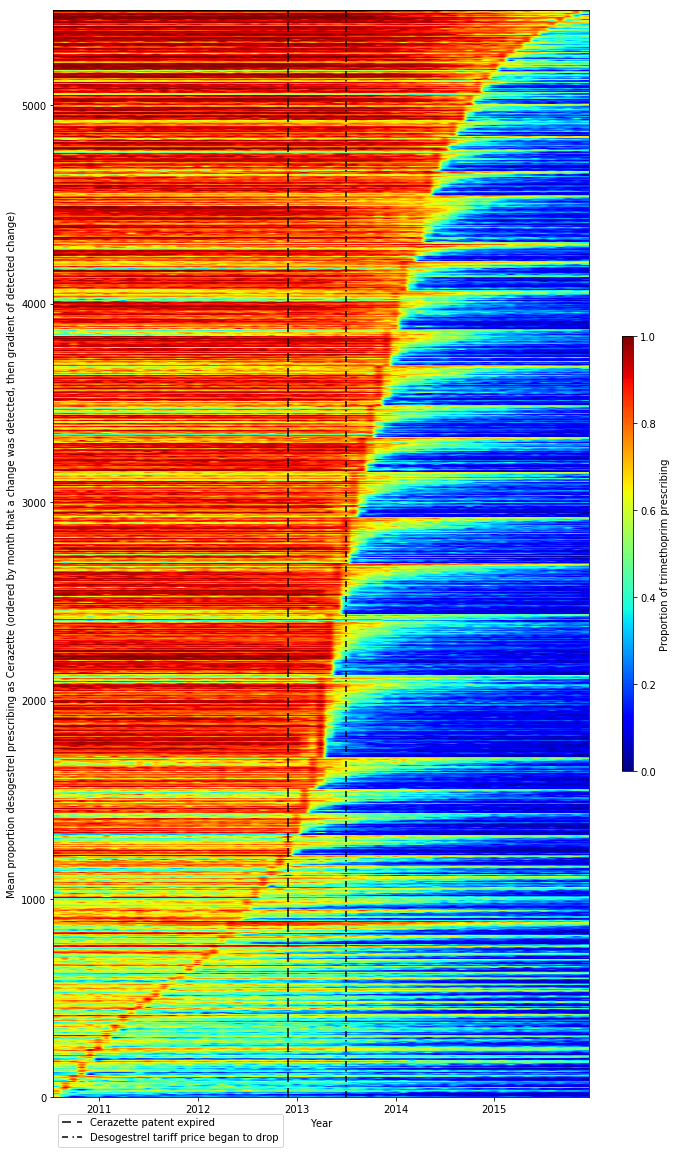

In [144]:
transposed = prac_data_cerazette.transpose()
merged = transposed.merge(practice_cerazette.set_index('name')[['is.tfirstneg.big','is.tfirstneg.offs','is.slope.ma.prop']],how='left',left_index=True,right_index=True)
merged = merged.sort_values(['is.tfirstneg.big','is.slope.ma.prop'])#,pd.to_datetime('2013-07-01')])
merged = merged.drop(columns=['is.slope.ma.prop','is.tfirstneg.offs'])
merged = merged.dropna()
merged = merged.drop(columns=['is.tfirstneg.big'])
fig = plt.figure(figsize=(12,20))
ax = plt.subplot()

dates = merged.columns
dnum = mdates.date2num(dates)
start = dnum[0] - (dnum[1]-dnum[0])/2.
stop = dnum[-1] + (dnum[1]-dnum[0])/2.
extent = [start, stop, 0, len(merged.index)]

img = ax.imshow(merged,
          extent=extent,
          aspect='auto',
          cmap='jet',
          interpolation='kaiser',
          origin='lower'
         )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

numdate = mdates.date2num(pd.to_datetime('2012-12-01'))
ax.axvline(x=numdate,label='Cerazette patent expired',
                   linewidth=1.5, dashes = (6,4), color='k')
numdate = mdates.date2num(pd.to_datetime('2013-07-01'))
ax.axvline(x=numdate,label='Desogestrel tariff price began to drop',
                   linewidth=1.5, dashes = (4,3,1,2), color='k')

ax.legend(loc=3, bbox_to_anchor=(0, -0.05))
cbar = fig.colorbar(img,aspect=40,shrink=0.4)
cbar.ax.set_ylabel('Proportion of trimethoprim prescribing')
ax.set_xlabel('Year')
ax.set_ylabel('Mean proportion desogestrel prescribing as Cerazette (ordered by month that a change was detected, then gradient of detected change)')
plt.show()

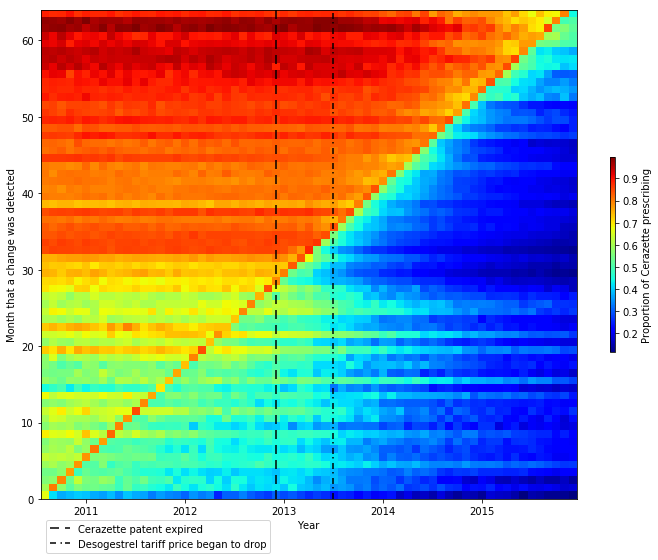

In [146]:
transposed = prac_data_cerazette.transpose()
merged = transposed.merge(practice_cerazette.set_index('name')[['is.tfirstneg.big','is.tfirstneg.offs','is.slope.ma.prop']],how='left',left_index=True,right_index=True)
merged = merged.sort_values(['is.tfirstneg.big','is.slope.ma.prop'])#,pd.to_datetime('2013-07-01')])
merged = merged.drop(columns=['is.slope.ma.prop','is.tfirstneg.offs'])
merged = merged.dropna()
merged = merged.groupby('is.tfirstneg.big').mean()
fig = plt.figure(figsize=(12,9))
ax = plt.subplot()

dates = merged.columns
dnum = mdates.date2num(dates)
start = dnum[0] - (dnum[1]-dnum[0])/2.
stop = dnum[-1] + (dnum[1]-dnum[0])/2.
extent = [start, stop, 0, len(merged.index)]

img = ax.imshow(merged,
          extent=extent,
          aspect='auto',
          cmap='jet',
          #interpolation='kaiser',
          origin='lower'
         )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

numdate = mdates.date2num(pd.to_datetime('2012-12-01'))
ax.axvline(x=numdate,label='Cerazette patent expired',
                   linewidth=1.5, dashes = (6,4), color='k')
numdate = mdates.date2num(pd.to_datetime('2013-07-01'))
ax.axvline(x=numdate,label='Desogestrel tariff price began to drop',
                   linewidth=1.5, dashes = (4,3,1,2), color='k')

ax.legend(loc=3, bbox_to_anchor=(0, -0.12))
cbar = fig.colorbar(img,aspect=40,shrink=0.4)
cbar.ax.set_ylabel('Proportion of Cerazette prescribing')
ax.set_xlabel('Year')
ax.set_ylabel('Month that a change was detected')
plt.show()

# Trimethoprim

In [19]:
q='''
SELECT
  month,
  practice,
  SUM(IF(SUBSTR(bnf_code,1,9)='0501080W0',
      items,
      0)) AS numerator,
  SUM(items) AS denominator
FROM
  ebmdatalab.hscic.normalised_prescribing_standard
INNER JOIN
  ebmdatalab.hscic.practices prac
ON
  practice = prac.code
  AND setting = 4
WHERE
  (bnf_code LIKE '0501130R0%'
  OR bnf_code LIKE '0501080W0%')
  AND
  month >= "2013-06-01"
  AND
  month <= "2018-06-01"
GROUP BY
  pct,
  practice,
  month
ORDER BY
  practice,
  month
'''
prac_data = pd.read_gbq(q, dialect='standard', project_id = 'ebmdatalab')
prac_data['calc_value'] = prac_data['numerator'] / prac_data['denominator']
prac_data = prac_data.drop(columns=['numerator','denominator'])
prac_data['practice'] = 'ratio_quantity.' + prac_data['practice'].astype(str)
prac_data = prac_data.set_index(['month','practice']).unstack().reset_index(col_level=1)
prac_data.columns = prac_data.columns.droplevel()
prac_data['month'] = pd.to_datetime(prac_data['month'])
prac_data = prac_data.set_index('month')
prac_data = prac_data.dropna(axis=1)
prac_data.head()

practice,ratio_quantity.A81001,ratio_quantity.A81002,ratio_quantity.A81004,ratio_quantity.A81005,ratio_quantity.A81006,ratio_quantity.A81007,ratio_quantity.A81009,ratio_quantity.A81011,ratio_quantity.A81012,ratio_quantity.A81013,...,ratio_quantity.Y03441,ratio_quantity.Y03587,ratio_quantity.Y03595,ratio_quantity.Y03597,ratio_quantity.Y03602,ratio_quantity.Y03656,ratio_quantity.Y03661,ratio_quantity.Y03663,ratio_quantity.Y03664,ratio_quantity.Y03755
month,,,,,,,,,,,,,,,,,,,,,
2013-06-01,0.853659,0.672515,0.662651,0.644231,0.522059,0.616822,0.808219,0.783019,0.656250,0.772727,...,0.555556,0.833333,0.897959,0.280000,0.428571,0.914286,0.580000,0.333333,0.733333,0.870968
2013-07-01,0.760870,0.643836,0.671642,0.505747,0.483696,0.635593,0.775000,0.680672,0.714286,0.684211,...,0.454545,0.821429,0.846154,0.590909,0.592593,0.818182,0.581818,0.380952,0.727273,0.625000
2013-08-01,0.765957,0.666667,0.780822,0.544643,0.487013,0.628571,0.722892,0.756522,0.581395,0.716667,...,0.500000,0.758621,0.829268,0.520000,0.702703,0.913043,0.460317,0.514286,0.363636,0.700000
2013-09-01,0.730769,0.666667,0.605634,0.712963,0.524138,0.633929,0.752809,0.700000,0.610169,0.627451,...,0.538462,0.945946,0.671875,0.428571,0.531250,0.813953,0.551724,0.457143,0.818182,0.742857
2013-10-01,0.696429,0.689266,0.747368,0.674797,0.503356,0.620370,0.728972,0.752475,0.571429,0.764706,...,0.555556,0.642857,0.704918,0.692308,0.660000,0.816327,0.490196,0.342857,0.538462,0.731707


prac_data
prac_data - unstacked version for heatmap
prac_deciles

In [20]:
x = ChangeDetection(name='trimethoprim_measure')
practice = x.detect_change()
practice.head()

,is.nbreak,is.tfirstneg,is.tfirstneg.pknown,is.tfirstneg.pknown.offs,is.tfirstneg.offs,is.tfirstneg.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
name,,,,,,,,,,,,,
A81001,2,45.0,45.0,NaN,NaN,45.0,-0.377109,-1.014628,1.000652,0.748780,0.371917,0.376863,0.503302
A81002,2,49.0,49.0,NaN,NaN,49.0,-0.197573,-0.435619,0.595645,0.651117,0.319422,0.331695,0.509425
A81004,2,48.0,48.0,NaN,NaN,48.0,-0.111683,-0.201516,0.578084,0.665898,0.279506,0.386391,0.580257
A81005,2,47.0,47.0,47.0,47.0,47.0,-0.062706,-0.125461,0.609689,0.562508,0.253962,0.308547,0.548519
A81006,2,47.0,47.0,47.0,47.0,47.0,-0.038813,-0.079218,0.580553,0.528766,0.395055,0.133711,0.252874


In [21]:
practice = practice.replace([np.inf, -np.inf], np.nan)
practice.head()

,is.nbreak,is.tfirstneg,is.tfirstneg.pknown,is.tfirstneg.pknown.offs,is.tfirstneg.offs,is.tfirstneg.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
name,,,,,,,,,,,,,
A81001,2,45.0,45.0,NaN,NaN,45.0,-0.377109,-1.014628,1.000652,0.748780,0.371917,0.376863,0.503302
A81002,2,49.0,49.0,NaN,NaN,49.0,-0.197573,-0.435619,0.595645,0.651117,0.319422,0.331695,0.509425
A81004,2,48.0,48.0,NaN,NaN,48.0,-0.111683,-0.201516,0.578084,0.665898,0.279506,0.386391,0.580257
A81005,2,47.0,47.0,47.0,47.0,47.0,-0.062706,-0.125461,0.609689,0.562508,0.253962,0.308547,0.548519
A81006,2,47.0,47.0,47.0,47.0,47.0,-0.038813,-0.079218,0.580553,0.528766,0.395055,0.133711,0.252874


In [22]:
pd.set_option("display.max_columns",101)

In [23]:
practice_deciles = pd.DataFrame(prac_data.stack(),columns=['calc_value']).reset_index(level=0)
x1 = np.arange(0.1, 1, 0.1)
x2 = np.arange(0.01,0.1,0.01)
x3 = np.arange(0.91, 1, 0.01)
x = np.concatenate((x1,x2,x3))
#practice_deciles['month'] = pd.to_datetime(practice_deciles['month'])
practice_deciles = practice_deciles.groupby('month').quantile(x)
practice_deciles = practice_deciles.reset_index(level=1)
#practice_deciles['level_1'] = practice_deciles['level_1']*100

practice_deciles = practice_deciles.set_index(['level_1'], append=True)
practice_deciles = practice_deciles.unstack(level=1)
practice_deciles.columns = practice_deciles.columns.droplevel()

practice_deciles.index = pd.to_datetime(practice_deciles.index)
practice_deciles.head()

level_1,0.01,0.02,0.03,0.04,0.05,0.060000000000000005,0.06999999999999999,0.08,0.09,0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7000000000000001,0.8,0.9,0.91,0.92,0.93,0.9400000000000001,0.9500000000000001,0.9600000000000001,0.9700000000000001,0.9800000000000001,0.9900000000000001
month,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-01,0.200000,0.266667,0.309942,0.341007,0.367313,0.387097,0.409091,0.426585,0.444444,0.454545,0.540541,0.594595,0.636364,0.667708,0.704082,0.738903,0.780044,0.837238,0.846154,0.857143,0.866667,0.875000,0.888889,0.900000,0.916667,0.944444,1.000000
2013-07-01,0.200000,0.270270,0.310475,0.341337,0.368421,0.395349,0.410187,0.426686,0.441712,0.455864,0.543478,0.597222,0.636364,0.666667,0.703704,0.736842,0.777778,0.833333,0.840000,0.846154,0.857143,0.866667,0.880000,0.894737,0.913043,0.937500,1.000000
2013-08-01,0.208935,0.266667,0.307692,0.333333,0.367347,0.390754,0.407554,0.426245,0.440346,0.455696,0.544000,0.593277,0.633878,0.666667,0.700519,0.735294,0.776471,0.831784,0.838992,0.848068,0.857143,0.869565,0.880973,0.897171,0.916667,0.939527,1.000000
2013-09-01,0.207693,0.270985,0.304348,0.340764,0.367068,0.389971,0.411547,0.428571,0.443667,0.458333,0.545455,0.600000,0.638889,0.671053,0.704545,0.739130,0.777778,0.833333,0.839181,0.848068,0.857143,0.869565,0.879345,0.894737,0.910058,0.933333,1.000000
2013-10-01,0.210526,0.277456,0.321531,0.351928,0.380919,0.400000,0.416414,0.433382,0.444444,0.457762,0.548387,0.601747,0.641457,0.675676,0.707317,0.741071,0.778689,0.833333,0.840909,0.850000,0.859744,0.870130,0.880000,0.894737,0.909091,0.933333,0.969059


In [24]:
offset_date = practice['is.tfirstneg.big'] -1
offset_date = offset_date.dropna().apply(lambda x: relativedelta(months=x))
practice_breaks = practice_deciles.index.min() + offset_date
practice_breaks.head()

name
A81001   2017-02-01
A81002   2017-06-01
A81004   2017-05-01
A81005   2017-04-01
A81006   2017-04-01
Name: is.tfirstneg.big, dtype: datetime64[ns]

In [25]:
mean_slope = practice[['is.tfirstneg.big','is.slope.ma']]
mean_slope = mean_slope.groupby('is.tfirstneg.big').mean()
mean_slope = pd.concat([mean_slope,pd.DataFrame([[0]], columns=['is.slope.ma'])],axis=0)
mean_slope = mean_slope.sort_index()
mean_slope.head()

,is.slope.ma
0.0,0.000000
2.0,-0.012324
3.0,-0.007685
4.0,-0.028771
5.0,-0.013153


In [26]:
mean_change = practice[['is.tfirstneg.big','is.intlev.levd']]
mean_change = mean_change.groupby('is.tfirstneg.big').mean()
mean_change = pd.concat([mean_change,pd.DataFrame([[0]], columns=['is.intlev.levd'])],axis=0)
mean_change = mean_change.sort_index()
mean_change.head()

,is.intlev.levd
0.0,0.000000
2.0,0.340585
3.0,0.373396
4.0,0.393931
5.0,0.352986


In [27]:
prac_data.index.max()

Timestamp('2018-06-01 00:00:00')

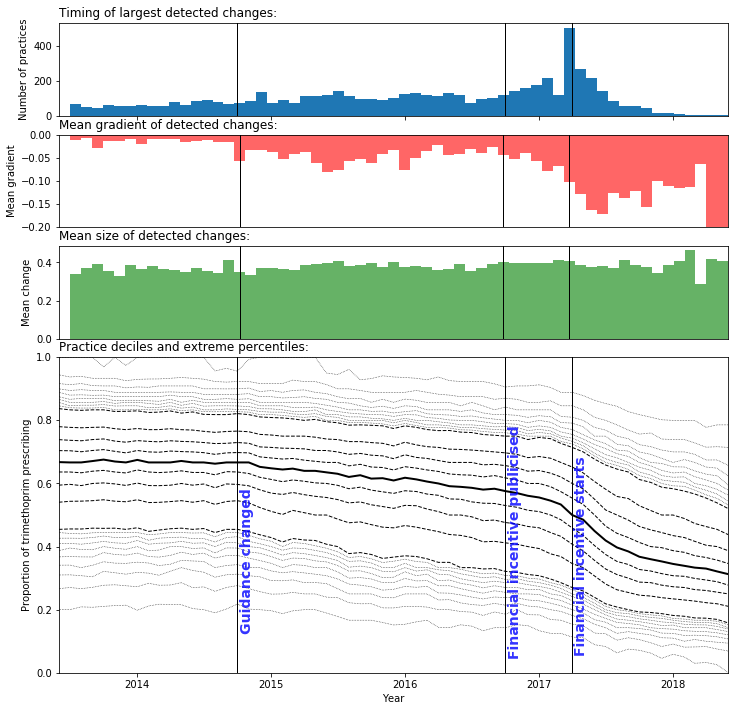

In [73]:
# Plot figure with subplots of different sizes
fig,ax = plt.subplots(1)
# set up subplot grid
gridspec.GridSpec(7,4)

# decile subplot
ax = plt.subplot2grid((7,4), (3,0), colspan=4, rowspan=3)
ax.set_title('Practice deciles and extreme percentiles:',loc='left')
ax.set_ylabel('Proportion of trimethoprim prescribing')
ax.set_xlim([practice_deciles.index.min(),practice_deciles.index.max()])
ax.set_xlabel('Year')
ax.set_ylim([0,1])
for decile in x:   # plot each decile/centile line
    data = practice_deciles[decile]
    if decile == .5:
        ax.plot(data,'k-',linewidth=2,label='')
    elif (decile <0.1) | (decile >0.9):
        ax.plot(data,'k:',linewidth=0.6,label='')
    else:
        ax.plot(data,'k--',linewidth=1,label='')
ax.axvline(x='2014-10-01',label='PHE guidance changed',
                   linewidth=1, color='k')
ax.axvline(x='2016-10-01',label='QP document first released',
                   linewidth=1, color='k')
ax.axvline(x='2017-04-01',label='QP monitoring period starts',
                   linewidth=1, color='k')
ax.legend()
ax.legend_.remove()

ax.annotate('Guidance changed', ('2014-10-07',0.55),fontweight='bold',rotation=90,fontsize=14,color='b',alpha=.8)
ax.annotate('Financial incentive publicised', ('2016-10-07',0.75),fontweight='bold',rotation=90,fontsize=14,color='b',alpha=.8)
ax.annotate('Financial incentive starts', ('2017-04-07',0.65),fontweight='bold',rotation=90,fontsize=14,color='b',alpha=.8)

# timing of change
ax = plt.subplot2grid((7,4), (0,0), colspan=4)
ax.set_title('Timing of largest detected changes:',loc='left')
ax.set_ylabel('Number of practices')
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim([practice_deciles.index.min(),practice_deciles.index.max()])
ax.hist(practice_breaks, bins=60)
ax.axvline(x='2014-10-01',label='PHE guidance changed',
                   linewidth=1, color='k')
ax.axvline(x='2016-10-01',label='QP document first released',
                   linewidth=1, color='k')
ax.axvline(x='2017-04-01',label='QP monitoring period starts',
                   linewidth=1, color='k')

# gradient of change
ax = plt.subplot2grid((7,4), (1,0), colspan=4)
ax.set_title('Mean gradient of detected changes:',loc='left')
ax.set_ylabel('Mean gradient')
ax.axes.xaxis.set_visible(False)
ax.set_ylim([-0.2,0])
mean_slope.plot.bar(ax=ax, width=1, color = 'r',alpha=.6)
ax.axvline(x=16,label='PHE guidance changed',
                   linewidth=1, color='k')
ax.axvline(x=40,label='QP document first released',
                   linewidth=1, color='k')
ax.axvline(x=46,label='QP monitoring period starts',
                   linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# magnitude of change
ax = plt.subplot2grid((7,4), (2,0), colspan=4)
ax.set_title('Mean size of detected changes:',loc='left')
ax.set_ylabel('Mean change')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_change.plot.bar(ax=ax, width=1, color = 'g',alpha=.6)
ax.axvline(x=16,label='PHE guidance changed',
                   linewidth=1, color='k')
ax.axvline(x=40,label='QP document first released',
                   linewidth=1, color='k')
ax.axvline(x=46,label='QP monitoring period starts',
                   linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# fit subplots and save fig
fig.set_size_inches(w=12,h=14)
fig.savefig('trimethoprim_deciles.png', format='png', dpi=300,bbox_inches='tight')

In [37]:
practice_breaks.quantile(.5)

Timestamp('2016-04-01 00:00:00')

In [38]:
practice_breaks.quantile(.25)

Timestamp('2015-03-01 00:00:00')

In [39]:
practice_breaks.quantile(.9)

Timestamp('2017-06-01 00:00:00')

In [45]:
from datetime import datetime
practice_breaks.quantile(.9) - datetime.strptime('2014-10-01','%Y-%m-%d')

Timedelta('974 days 00:00:00')

In [40]:
(practice['is.tfirstneg.big']-17).describe()

count    5897.000000
mean       15.855520
std        14.335821
min       -15.000000
25%         5.000000
50%        18.000000
75%        29.000000
max        44.000000
Name: is.tfirstneg.big, dtype: float64

In [46]:
practice['is.slope.ma'].describe()

count    5897.000000
mean       -0.063967
std         0.100853
min        -0.979158
25%        -0.069855
50%        -0.020518
75%        -0.009892
max         0.471370
Name: is.slope.ma, dtype: float64

In [47]:
practice['is.intlev.levd'].describe()

count    5897.000000
mean        0.382644
std         0.136886
min        -0.327719
25%         0.287349
50%         0.377957
75%         0.467325
max         1.050784
Name: is.intlev.levd, dtype: float64

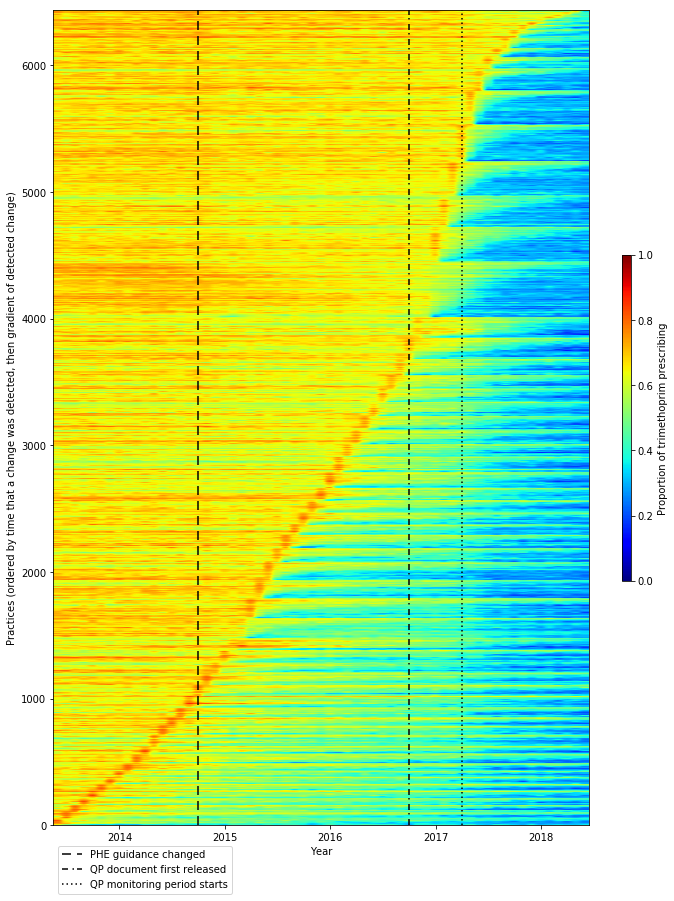

In [122]:
transposed = prac_data.transpose()
merged = transposed.merge(practice.set_index('name')[['is.tfirstneg.big','is.tfirstneg.offs','is.slope.ma.prop']],how='left',left_index=True,right_index=True)
merged = merged.sort_values(['is.tfirstneg.big','is.slope.ma.prop'])#,pd.to_datetime('2013-07-01')])
merged = merged.drop(columns=['is.slope.ma.prop','is.tfirstneg.offs'])
merged = merged.dropna()
merged = merged.drop(columns=['is.tfirstneg.big'])
fig = plt.figure(figsize=(12,15))
ax = plt.subplot()

dates = merged.columns
dnum = mdates.date2num(dates)
start = dnum[0] - (dnum[1]-dnum[0])/2.
stop = dnum[-1] + (dnum[1]-dnum[0])/2.
extent = [start, stop, 0, len(merged.index)]

img = ax.imshow(merged,
          extent=extent,
          aspect='auto',
          cmap='jet',
          interpolation='kaiser',
          origin='lower'
         )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

numdate = mdates.date2num(pd.to_datetime('2014-10-01'))
ax.axvline(x=numdate,label='PHE guidance changed', linewidth=1.5, dashes = (6,4), color='k')
numdate = mdates.date2num(pd.to_datetime('2016-10-01'))
ax.axvline(x=numdate,label='QP document first released', linewidth=1.5, dashes = (4,3,1,2), color='k')
numdate = mdates.date2num(pd.to_datetime('2017-04-01'))
ax.axvline(x=numdate,label='QP monitoring period starts', linewidth=1.5, dashes = (1,2), color='k')

ax.legend(loc=3, bbox_to_anchor=(0, -0.09))
cbar = fig.colorbar(img,aspect=40,shrink=0.4)
cbar.ax.set_ylabel('Proportion of trimethoprim prescribing')
ax.set_xlabel('Year')
ax.set_ylabel('Practices (ordered by time that a change was detected, then gradient of detected change)')
plt.show()

In [123]:
practice.loc[practice['is.tfirstneg.big']==22].sort_values(['is.tfirstneg','is.slope.ma.prop'])

,Unnamed: 0,name,is.nbreak,is.tfirstneg,is.tfirstneg.pknown,is.tfirstneg.pknown.offs,is.tfirstneg.offs,is.tfirstneg.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
4662,4663,ratio_quantity.L82056,3,2.0,2.0,2.0,2.0,22.0,-0.010481,-0.013189,0.504806,0.860748,0.320946,0.539801,0.627131
4313,4314,ratio_quantity.K82019,3,2.0,2.0,22.0,22.0,22.0,-0.008601,-0.012791,0.515859,0.683577,0.316786,0.366791,0.536575
3070,3071,ratio_quantity.G82020,3,13.0,13.0,13.0,13.0,22.0,-0.010550,-0.014452,0.515605,0.770134,0.299538,0.470596,0.611057
5532,5533,ratio_quantity.M87618,2,13.0,13.0,NaN,NaN,22.0,0.008228,0.016723,0.513278,0.522382,0.586503,-0.064121,-0.122747
2624,2625,ratio_quantity.F82653,3,15.0,15.0,22.0,22.0,22.0,-0.018023,-0.023168,0.502800,0.844890,0.199667,0.645223,0.763677
5409,5410,ratio_quantity.M85676,2,22.0,22.0,22.0,22.0,22.0,-0.385927,-1.276453,1.128345,0.688270,0.346241,0.342029,0.496940
6569,6570,ratio_quantity.P89602,3,22.0,22.0,22.0,22.0,22.0,-0.325518,-0.813760,0.706120,0.725536,0.264540,0.460996,0.635386
4144,4145,ratio_quantity.J83029,2,22.0,22.0,22.0,22.0,22.0,-0.248710,-0.593751,0.899111,0.667591,0.390973,0.276618,0.414353
3241,3242,ratio_quantity.G82702,4,22.0,22.0,25.0,25.0,22.0,-0.283893,-0.540161,0.821376,0.809465,0.463833,0.345631,0.426987
982,983,ratio_quantity.C81113,2,22.0,22.0,22.0,22.0,22.0,-0.189430,-0.434287,0.604334,0.625618,0.312164,0.313453,0.501030


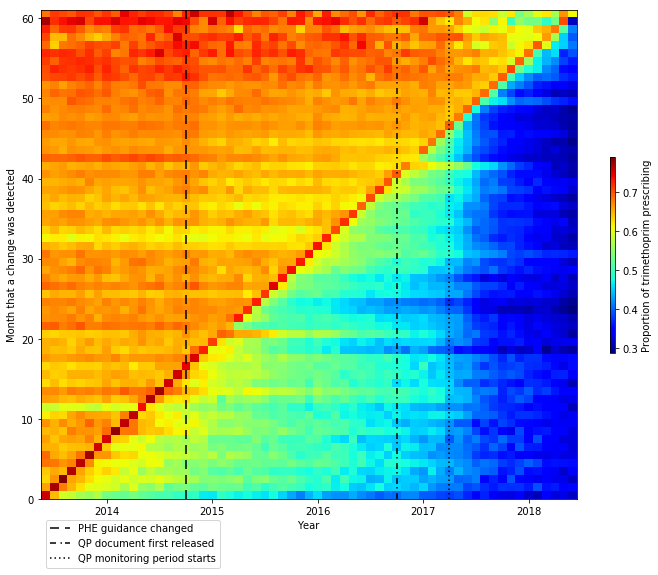

In [124]:
transposed = prac_data.transpose()
merged = transposed.merge(practice.set_index('name')[['is.tfirstneg.big','is.tfirstneg.offs','is.slope.ma.prop']],how='left',left_index=True,right_index=True)
merged = merged.sort_values(['is.tfirstneg.big','is.slope.ma.prop'])#,pd.to_datetime('2013-07-01')])
merged = merged.drop(columns=['is.slope.ma.prop','is.tfirstneg.offs'])
merged = merged.dropna()
merged = merged.groupby('is.tfirstneg.big').mean()
fig = plt.figure(figsize=(12,9))
ax = plt.subplot()

dates = merged.columns
dnum = mdates.date2num(dates)
start = dnum[0] - (dnum[1]-dnum[0])/2.
stop = dnum[-1] + (dnum[1]-dnum[0])/2.
extent = [start, stop, 0, len(merged.index)]

img = ax.imshow(merged,
          extent=extent,
          aspect='auto',
          cmap='jet',
          #interpolation='kaiser',
          origin='lower'
         )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#ax.yaxis.

numdate = mdates.date2num(pd.to_datetime('2014-10-01'))
ax.axvline(x=numdate,label='PHE guidance changed', linewidth=1.5, dashes = (6,4), color='k')
numdate = mdates.date2num(pd.to_datetime('2016-10-01'))
ax.axvline(x=numdate,label='QP document first released', linewidth=1.5, dashes = (4,3,1,2), color='k')
numdate = mdates.date2num(pd.to_datetime('2017-04-01'))
ax.axvline(x=numdate,label='QP monitoring period starts', linewidth=1.5, dashes = (1,2), color='k')

ax.legend(loc=3, bbox_to_anchor=(0, -0.15))
cbar = fig.colorbar(img,aspect=40,shrink=0.4)
cbar.ax.set_ylabel('Proportion of trimethoprim prescribing')
ax.set_xlabel('Year')
ax.set_ylabel('Month that a change was detected')
plt.show()